Mini Portfolio Data Visualization

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read dataset
df = pd.read_csv('telco_customer.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
#check duplicate data
df.duplicated().any()

False

# Normal

## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

In [9]:
df_grouped = df.groupby(['PaymentMethod']).agg({'MonthlyCharges' : 'mean'}).reset_index()
df_grouped.rename(columns = {'MonthlyCharges' : 'Mean_MonthlyCharges'}, inplace = True)
df_grouped

,PaymentMethod,Mean_MonthlyCharges
0,Bank transfer (automatic),67.192649
1,Credit card (automatic),66.512385
2,Electronic check,76.255814
3,Mailed check,43.917060


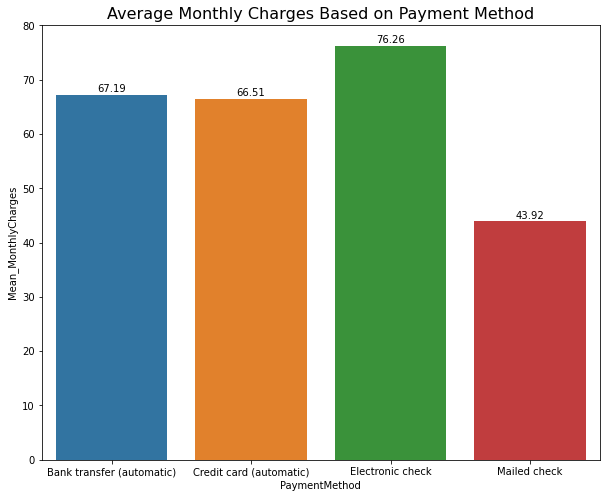

In [21]:
#initiate
x = df_grouped['PaymentMethod']
y = round(df_grouped['Mean_MonthlyCharges'], 2)

#plot
plt.figure(figsize = (10,8))
sns.barplot(x = 'PaymentMethod', y = 'Mean_MonthlyCharges', data = df_grouped)

#add data points
x_numbers = range(len(x))

for i in x_numbers:
    plt.text(x = x_numbers[i], y = y[i] + 0.5, s = str(y[i]), ha = 'center')
    
#title
plt.title('Average Monthly Charges Based on Payment Method', fontsize = 16);

Insight yang dapat diambil dari data visualisasi di atas adalah bahwa rata-rata monthly charges tertinggi ada di payment method electronic check dan diikuti dengan Bank Transfer. Payment method Mailed Check memiliki rata - rata Monthly Charges yang terendah.

## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 bulan
- medium_tenure: User dengan tenure 21 - 40 bulan
- high_tenure: User dengan tenure > 40 bulan

In [22]:
df['Tenure_Group'] = np.where(df['tenure'] < 21, 'Low', np.where(df['tenure'] > 40, 'High', 'Medium'))
df_grouped = df.groupby(['Tenure_Group']).agg({'customerID' : pd.Series.nunique}).reset_index()
df_rename = df_grouped.rename(columns = {'customerID' : 'Total_Customer'})
df_rename

,Tenure_Group,Total_Customer
0,High,2757
1,Low,2878
2,Medium,1408


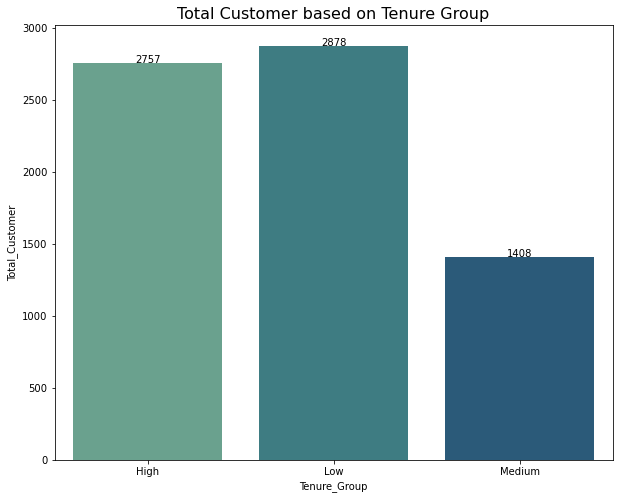

In [27]:
#initiate
x = df_rename['Tenure_Group']
y = df_rename['Total_Customer']

#plot
plt.figure(figsize = (10,8))
sns.barplot(x = 'Tenure_Group', y = 'Total_Customer', data = df_rename, palette = 'crest');

#add data points
x_numbers = range(len(x))

for i in x_numbers:
    plt.text(x = x_numbers[i], y = y[i] + 1.5, s = str(y[i]), ha = 'center')
    
#set title
plt.title('Total Customer based on Tenure Group', fontsize = 16);

Dapat disimpulkan bahwa Tenure Group yang Medium memiliki Total Customer yang terendah dibandingkan yang lain. Tenure Group yang Low memiliki Total Customer tertinggi

## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

In [28]:
df_senior = df.loc[df['SeniorCitizen'] == 1]
df_grouped = df_senior.groupby(['SeniorCitizen', 'PhoneService']).agg({'customerID' : pd.Series.nunique}).reset_index()
df_rename = df_grouped.rename(columns = {'customerID' : 'Total Customer'})
df_rename

,SeniorCitizen,PhoneService,Total Customer
0,1,No,104
1,1,Yes,1038


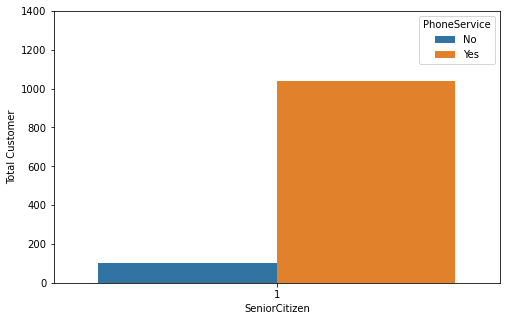

In [32]:
#alternatif 1

#plot
plt.figure(figsize = (8,5))
sns.barplot(x = 'SeniorCitizen', y = 'Total Customer', data = df_rename, hue = 'PhoneService')

#set limit
plt.ylim(0, 1400);

In [30]:
df_grupi = df.groupby(['SeniorCitizen', 'PhoneService']).agg({'customerID' : pd.Series.nunique}).reset_index()
df_rinem = df_grupi.rename(columns = {'customerID' : 'TotalCustomer'})
df_rinem

,SeniorCitizen,PhoneService,TotalCustomer
0,0,No,578
1,0,Yes,5323
2,1,No,104
3,1,Yes,1038


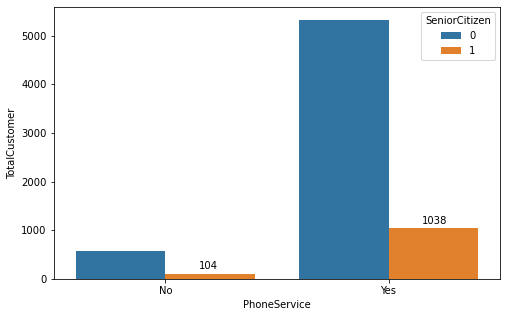

In [31]:
#alternatif 2

#plot
plt.figure(figsize = (8,5))
sns.barplot(x = 'PhoneService', y = 'TotalCustomer', hue = 'SeniorCitizen', data = df_rinem)

#add data points
plt.text(x = 0.15, y = 200 + 1.5, s = 104)
plt.text(x = 1.15, y = 1139 + 1.5, s = 1038);

Kesimpulan yang dapat diambil dari data yang ada di atas adalah bahwa kebanyakan SeniorCitizen menggunakan PhoneService

## Bagaimana Distribusi dari TotalCharge?

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [55]:
#convert TotalCharge type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


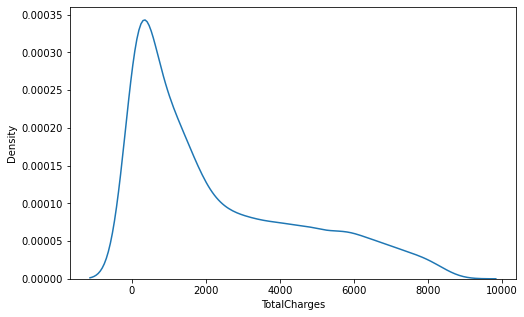

In [59]:
plt.figure(figsize = (8,5))
sns.kdeplot(x = 'TotalCharges', data = df);

Jadi, dari plot di atas, dapat disimpulkan bahwa Total Charges semakin tinggi cenderung memiliki frekuensi pembelian yang rendah.

# Intermediate

## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

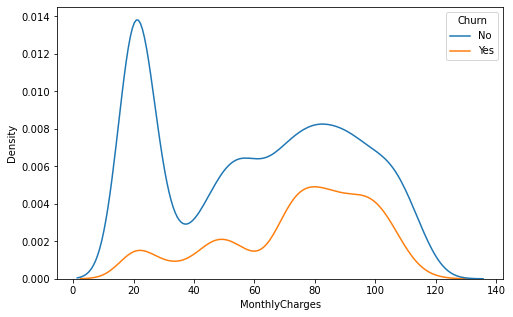

In [61]:
plt.figure(figsize = (8,5))
sns.kdeplot(x = 'MonthlyCharges', hue = 'Churn', data = df)

Jadi, dari plot di atas, dapat disimpulkan bahwa customer yang memiliki biaya bulanan lebih tinggi akan cenderung untuk berhenti langganan

## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

In [76]:
df['Partner_Dependents'] = df['Partner'] + '-' + df['Dependents']
df_grouped = df.groupby(['Partner_Dependents', 'Churn']).agg({'customerID' : pd.Series.nunique}).reset_index()
df_rename = df_grouped.rename(columns = {'customerID' : 'Total Customer'})
df_rename

,Partner_Dependents,Churn,Total Customer
0,No-No,No,2157
1,No-No,Yes,1123
2,No-Yes,No,284
3,No-Yes,Yes,77
4,Yes-No,No,1233
5,Yes-No,Yes,420
6,Yes-Yes,No,1500
7,Yes-Yes,Yes,249


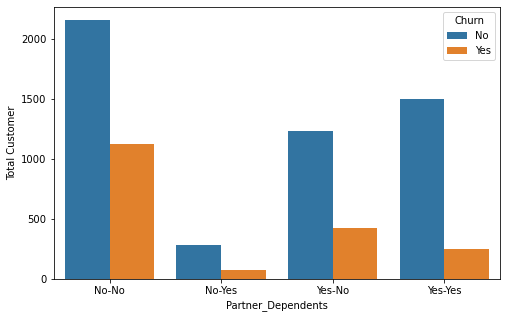

In [84]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'Partner_Dependents', y = 'Total Customer', data = df_rename, hue = 'Churn');

Jadi, dari plot di atas, dapat disimpulkan bahwa yang memiliki tingkat churn tertinggi ada pada customer yang single dan tidak punya tanggungan. Tingkat churn terendah ada pada customer single dan memiliki tanggungan.

In [86]:
df_grouped = df.groupby(['PaymentMethod', 'Churn']).agg({'customerID' : pd.Series.nunique}).reset_index()
df_rename = df_grouped.rename(columns = {'customerID' : 'Total Cust'})
df_rename

,PaymentMethod,Churn,Total Cust
0,Bank transfer (automatic),No,1286
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1290
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1304
7,Mailed check,Yes,308


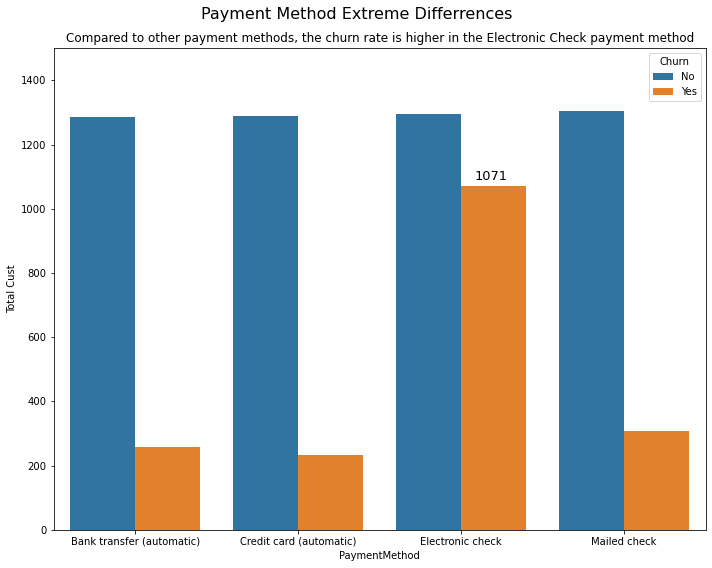

In [126]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'PaymentMethod', y = 'Total Cust', hue = 'Churn', data = df_rename)

plt.suptitle(t = 'Payment Method Extreme Differrences', fontsize = 16 )
plt.title('Compared to other payment methods, the churn rate is higher in the Electronic Check payment method')
plt.tight_layout()

plt.ylim(0, 1500)

plt.text(x = 2.08, y = 1100 + 1.5, s = 1071, fontsize = 13, va = 'center');